In [14]:
%reload_ext autoreload
%autoreload 2

In [15]:
from deepom.bionano_utils import MoleculeSelector

selector = MoleculeSelector()
selector.top_mol_num = 10
selector.select_molecules()

reading:  /home/ynogin/data/bionano_data/bnx.db


selected: 10it [00:00, 216.08it/s]


In [16]:
from deepom.bionano_compare import BionanoCompare

compare = BionanoCompare()
compare.read_cmap()
compare.make_refs()
compare.refs

1     [14453.0, 19686.0, 22554.0, 31191.0, 33547.0, ...
2     [15924.0, 22064.0, 28594.0, 34027.0, 34664.0, ...
3     [12734.0, 13105.0, 17438.0, 20151.0, 26344.0, ...
4     [12985.0, 14575.0, 23028.0, 27375.0, 35689.0, ...
5     [19314.0, 19924.0, 22572.0, 48655.0, 52154.0, ...
6     [76216.0, 78491.0, 80268.0, 84078.0, 92283.0, ...
7     [10487.0, 12916.0, 15501.0, 17193.0, 18142.0, ...
8     [61805.0, 66488.0, 70256.0, 73189.0, 79269.0, ...
9     [14566.0, 19799.0, 22667.0, 30973.0, 33330.0, ...
10    [18514.0, 19074.0, 29291.0, 29794.0, 32222.0, ...
11    [60457.0, 62233.0, 66043.0, 73015.0, 81386.0, ...
12    [14568.0, 19721.0, 24617.0, 33245.0, 35595.0, ...
13    [16004725.0, 16010361.0, 16021642.0, 16136233....
14    [16004725.0, 16010361.0, 16021642.0, 16031132....
15    [17050953.0, 17052426.0, 17058646.0, 17060180....
16    [14134.0, 19375.0, 28229.0, 38092.0, 44607.0, ...
17    [66653.0, 70073.0, 84695.0, 84709.0, 90870.0, ...
18    [18868.0, 19428.0, 29621.0, 30124.0, 32552

(0.0, 500.0)

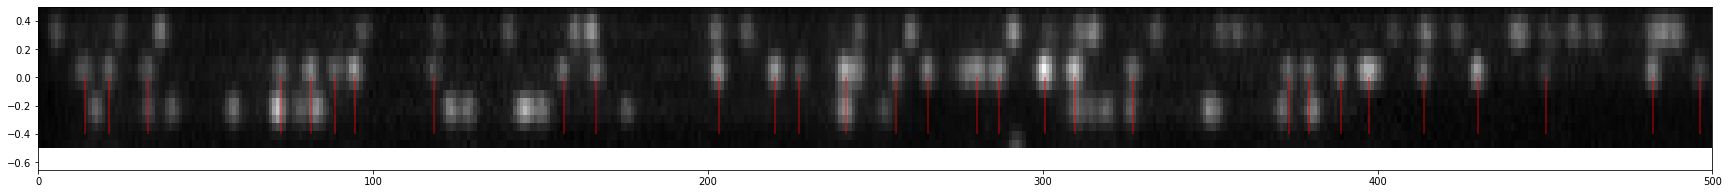

In [17]:
from matplotlib import pyplot as plt
selector.selected[0].plot_bnx_item()
plt.xlim(0, 500)

In [4]:
from deepom.config import Config
from deepom.localizer import LocalizerModule

localizer_module = LocalizerModule()
localizer_module.checkpoint_search_dir = Config.CHECKPOINT_SEARCH_DIR
localizer_module.load_checkpoint = True
localizer_module.init_ensure_module()

BasicUNet features: (32, 32, 64, 128, 256, 32).
loading checkpoint:  /home/ynogin/DeepOM/data/pretrained/checkpoint.pickle 




(0.0, 500.0)

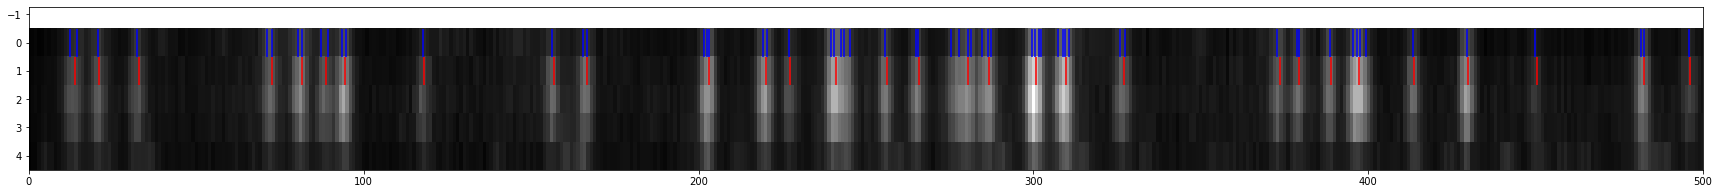

In [5]:
from matplotlib.pyplot import eventplot, imshow, figure, xlim

figure(figsize=(30, 3))
image_input = selector.selected[0].bionano_image.segment_image[0]
target_width = localizer_module.image_channels
source_width = image_input.shape[0] // 2 + 1
image_input = image_input[source_width - target_width // 2: source_width + target_width // 2 + 1]
imshow(image_input, aspect="auto", cmap="gray")
inference_item = localizer_module.inference_item(image_input)
eventplot([inference_item.loc_pred, selector.selected[0].locs / 375], colors=["b", "r"])
xlim([0, 500])

In [6]:
from deepom.aligner import Aligner

ref_id = selector.selected[0].xmap_item.ref_id
aligner = Aligner()
aligner.align_params = {}
# qry = selector.selected[0].locs / 375 * 335
qry = inference_item.loc_pred * 335
aligner.make_alignment(qry=qry, ref=compare.refs[ref_id])
selector.selected[0].xmap_item.ref_lims, aligner.alignment_ref[[0, -1]], # aligner.alignment_qry

(array([58098802., 58680228.]), array([58098802., 58671662.]))